Number of participants: 16
Columns names: ['UUID', 'Płeć', 'Wiek', 'uwagi']
       UUID Płeć  Wiek uwagi
0  02F6BC66    M    22   NaN
1  1299BF1A    K    23   NaN
2  2D663E30    M    22   NaN
3  4C0F44CF    M    25   NaN
4  827366EC    M    22   NaN

------------------------Basic data information------------------------
<Info | 10 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, T3, T4, T5, T6, F7, ...
 chs: 16 EEG, 3 misc, 1 Stimulus, 1 System status channel information (Triux systems)
 custom_ref_applied: False
 dig: 19 items (3 Cardinal, 16 EEG)
 file_id: 4 items (dict)
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 meas_id: 4 items (dict)
 nchan: 21
 projs: []
 sfreq: 250.0 Hz
>
Sampling frequency: 250.0 Hz
Number of channels: 21
Channels: ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'T3', 'T4', 'T5', 'T6', 'F7', 'F8', 'Accel_x', 'Accel_y', 'Accel_z', 'Digital', 'Sample']
Recording duration: 290.70 seconds

-----------

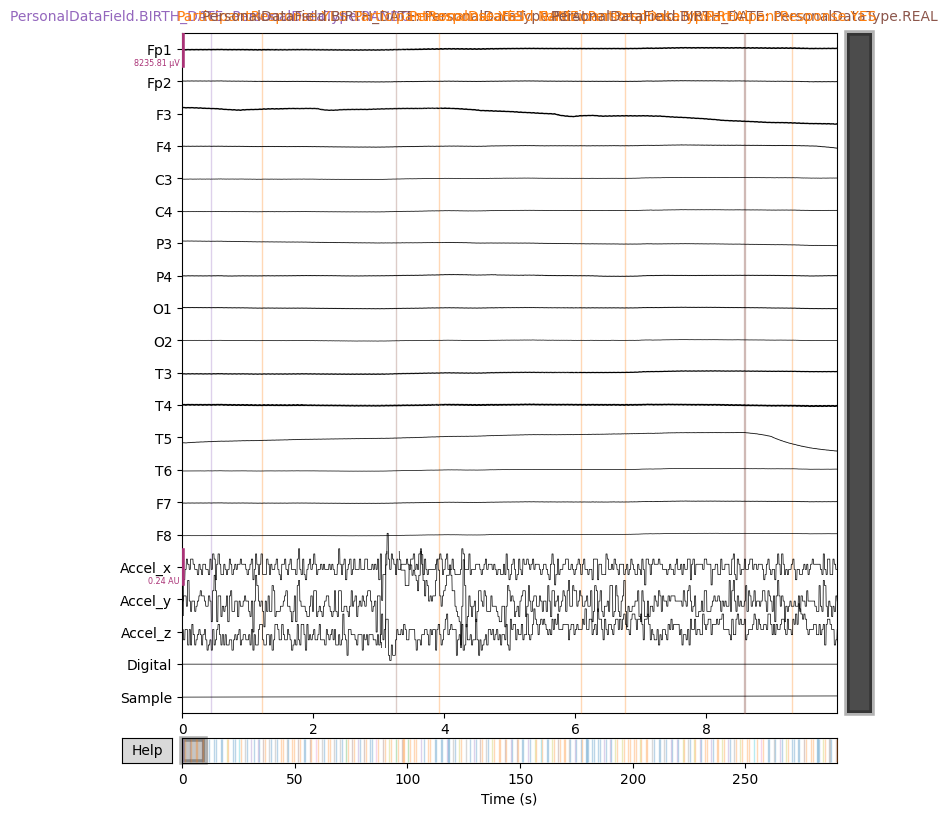

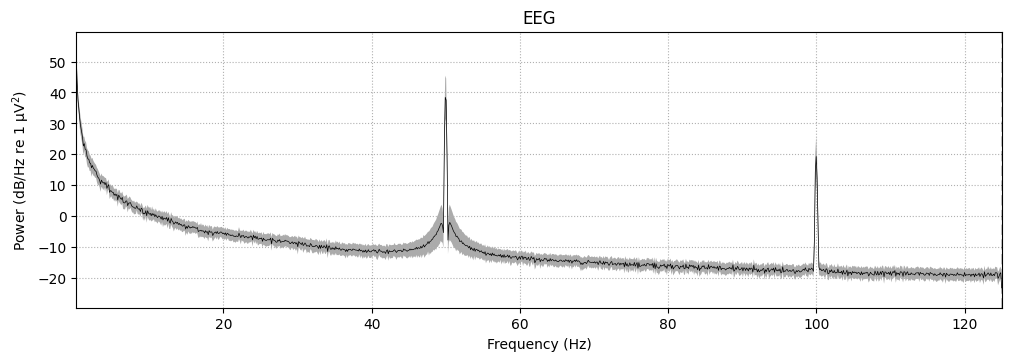

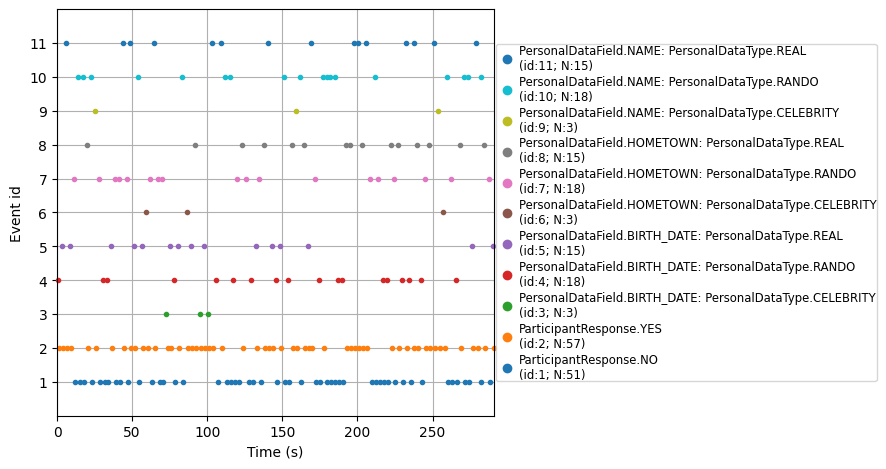

In [1]:
import os
import pandas as pd
import mne
import numpy as np
from matplotlib import pyplot as plt
import warnings

warnings.filterwarnings("ignore", category=RuntimeWarning, message="More events than default colors available.")
warnings.filterwarnings("ignore", message="FigureCanvasAgg is non-interactive, and thus cannot be shown")

DATA_FOLDER = "dataset"
SURVEY_FILE = os.path.join(DATA_FOLDER, "Ankiety.xlsx")

# Analisisty one of EEG file

EXAMPLE_USER = "2D663E30"
EXAMPLE_EEG_FILENAME = "EEG_ExperimentBlock.HONEST_RESPONSE_TO_TRUE_IDENTITY_raw.fif"
EXAMPLE_EEG_PATH = os.path.join(DATA_FOLDER, EXAMPLE_USER ,EXAMPLE_EEG_FILENAME)

# Opening survey
df_survey = pd.read_excel(SURVEY_FILE)
print(f"Number of participants: {len(df_survey)}") #number of rows
print(f"Columns names: {df_survey.columns.tolist()}")
#print(f"Rows: {df_survey.rows.tolist()}")
print(df_survey.head())

# Open sample EEG
raw = mne.io.read_raw_fif(EXAMPLE_EEG_PATH, preload=True, verbose=False)
raw.apply_function(lambda x: x*1e-6)

print(f"\n------------------------Basic data information------------------------")
print(raw.info)

print(f"Sampling frequency: {raw.info["sfreq"]} Hz")
print(f"Number of channels: {len(raw.ch_names)}")
print(f"Channels: {raw.ch_names}")
print(f"Recording duration: {raw.times[-1]:.2f} seconds")

print("\n------------------------Annotations (Events)------------------------")
if raw.annotations:
    print(f"Number of annotations: {len(raw.annotations)}")
    print("Example annotations:")

    for i, ann in enumerate(raw.annotations):
        if i < 5: # Show only the first 5 annotations
            print(f"Start: {ann['onset']:.2f} s, Duration: {ann['duration']:.2f} s, Description: {ann['description']}")

    # You can show only unique annotations:
    print(f"UUnique annotation types: {np.unique(raw.annotations.description)}")
else:
    print("No annotations in this file")


# Raw EEG Signal Visualizatio
print("\n------------------------Raw EEG Signal Visualization------------------------")

# Raw plot
raw.plot(n_channels=30,  # Show 30 channels
         duration=10,    # 10 seconds on one screen
         scalings='auto', # Automatic amplitude scaling
         title=f"Raw EEG Signal: {os.path.basename(EXAMPLE_EEG_FILENAME)}",
         show=False)

print(raw.annotations)

# Plot Power Spectral Density
mne.viz.plot_raw_psd(raw, fmin=0.1, fmax=125, average=True, verbose=False)

# Plot events
events, event_id = mne.events_from_annotations(raw, verbose=False)
mne.viz.plot_events(mne.events_from_annotations(raw)[0], sfreq=raw.info['sfreq'],
                    first_samp=raw.first_samp, event_id=mne.events_from_annotations(raw)[1], verbose=False)

plt.show() # Raw plot


------------------------Data BEFORE preprocessing------------------------
Number of channels: 21

------------------------Running preprocessing------------------------
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Number of channels after picking EEG types: 16
Applied a 1-40 Hz band-pass filter
Set standard_1020 montage.

------------------------Data AFTER preprocessing------------------------
Number of channels: 16


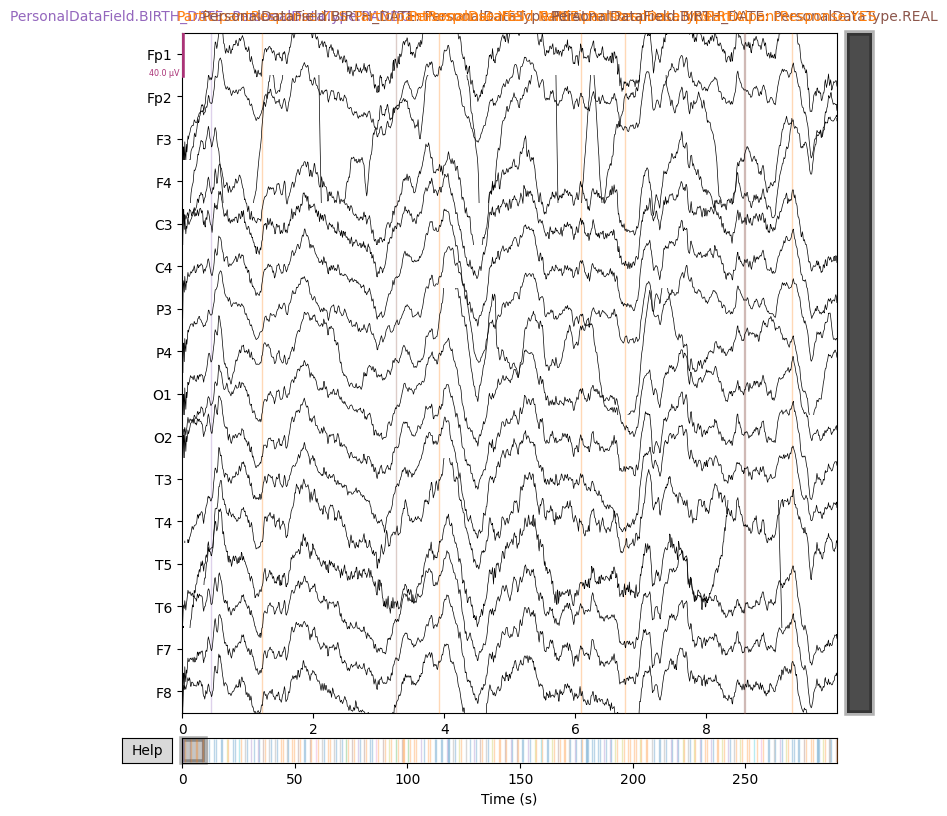

In [2]:
import mne
import os
import matplotlib.pyplot as plt


def preprocessing(raw_data):

    # Cleans the raw MNE data object.

    raw_copy = raw_data.copy()
    raw_copy.pick_types(eeg=True)
    print(f"Number of channels after picking EEG types: {len(raw_copy.ch_names)}")

    raw_copy.filter(l_freq=1.0, h_freq=40.0, fir_design='firwin', verbose=False)
    print("Applied a 1-40 Hz band-pass filter")

    montage = mne.channels.make_standard_montage('standard_1020')
    raw_copy.set_montage(montage, on_missing='warn')
    print("Set standard_1020 montage.")
    return raw_copy


DATA_FOLDER = "dataset"
EXAMPLE_USER = "2D663E30"
EXAMPLE_EEG_FILENAME = "EEG_ExperimentBlock.HONEST_RESPONSE_TO_TRUE_IDENTITY_raw.fif"
EXAMPLE_EEG_PATH = os.path.join(DATA_FOLDER, EXAMPLE_USER, EXAMPLE_EEG_FILENAME)

raw = mne.io.read_raw_fif(EXAMPLE_EEG_PATH, preload=True, verbose=False)
raw.apply_function(lambda x: x*1e-6)

print("\n------------------------Data BEFORE preprocessing------------------------")
print(f"Number of channels: {len(raw.ch_names)}")

print("\n------------------------Running preprocessing------------------------")
preprocessed_raw = preprocessing(raw)

print("\n------------------------Data AFTER preprocessing------------------------")
print(f"Number of channels: {len(preprocessed_raw.ch_names)}")

preprocessed_raw.plot(title="Preprocessed Data")

plt.show()


------------------------Data BEFORE preprocessing------------------------
Number of channels: 21

------------------------Running preprocessing------------------------
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Number of channels after picking EEG types: 16
Applied a 1-40 Hz band-pass filter
Set standard_1020 montage.

------------------------Data AFTER preprocessing------------------------
Number of channels: 16


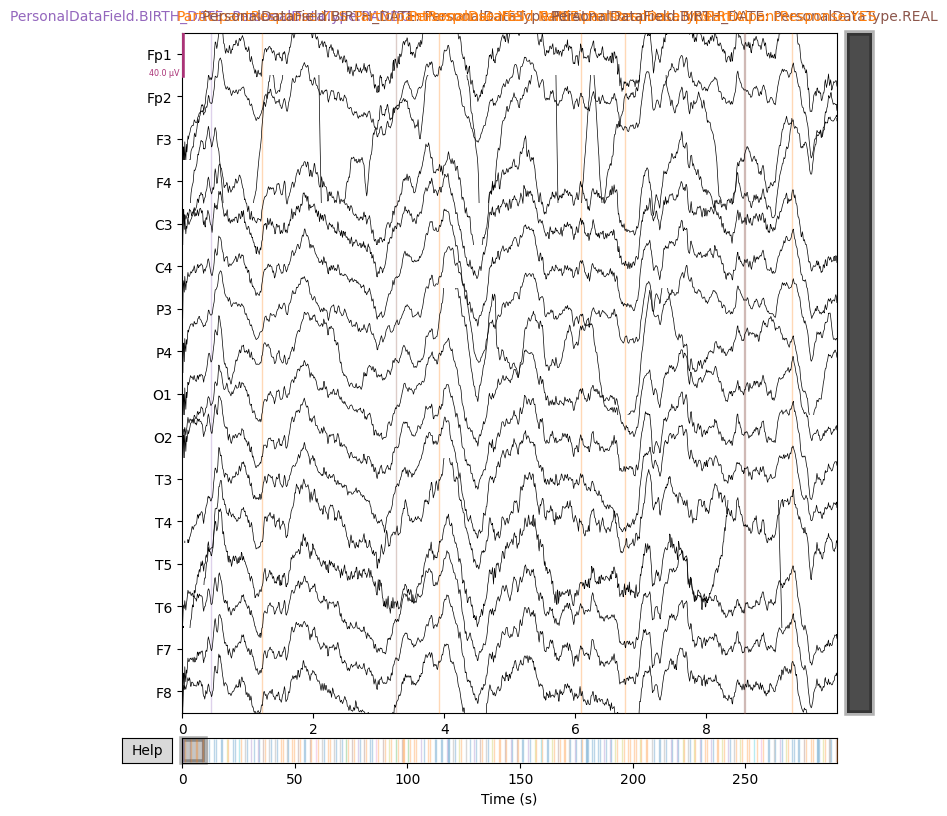

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Number of channels after picking EEG types: 16
Applied a 1-40 Hz band-pass filter
Set standard_1020 montage.
Created 107 epochs from the data

------------------------Epochs Information------------------------
<Epochs | 107 events (all good), -0.2 – 0.8 s (baseline -0.2 – 0 s), ~3.3 MiB, data loaded,
 np.str_('PersonalDataField.BIRTH_DATE: PersonalDataType.CELEBRITY'): 3
 np.str_('PersonalDataField.BIRTH_DATE: PersonalDataType.RANDO'): 18
 np.str_('PersonalDataField.BIRTH_DATE: PersonalDataType.REAL'): 14
 np.str_('PersonalDataField.HOMETOWN: PersonalDataType.CELEBRITY'): 3
 np.str_('PersonalDataField.HOMETOWN: PersonalDataType.RANDO'): 18
 np.str_('PersonalDataField.HOMETOWN: PersonalDataType.REAL'): 15
 np.str_('PersonalDataField.NAME: PersonalDataType.CELEBRITY'): 3
 np.str_('PersonalDataField.NAME: PersonalDataType.RANDO'): 18
 np.str_('PersonalDataField.NAME: PersonalDataType.REAL'): 15>


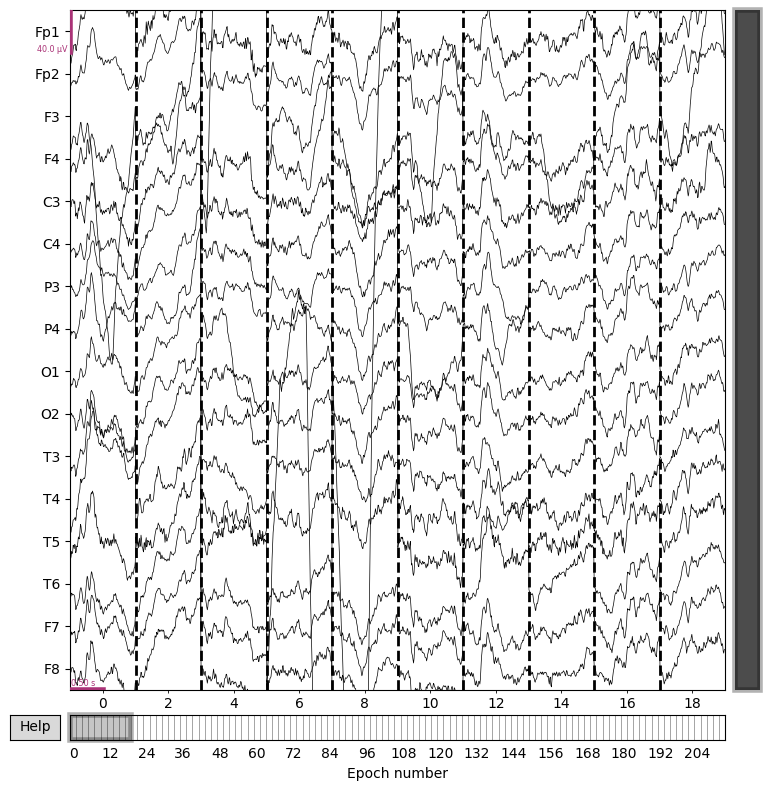

In [3]:
import mne
import os
import matplotlib.pyplot as plt
from preprocessing import preprocessing

# Cuts the continuous preprocessed EEG data into epochs around stimulus events
def create_epochs(preprocessed_raw_data, tmin=-0.2, tmax=0.8):

    # Find events from annotations selecting only stimulus-related ones
    events, event_id = mne.events_from_annotations(preprocessed_raw_data, verbose=False)
    stimulus_event_ids = {key: value for key, value in event_id.items() if 'PersonalDataField' in key}

    if not stimulus_event_ids:
        print("No stimulus events found")
        return None

    #print(f"Found {len(events)} total events")
    #print(f"Using {len(stimulus_event_ids)} stimulus types for epoching")

    # Create the epochs object
    epochs = mne.Epochs(
        preprocessed_raw_data,
        events=events,
        event_id=stimulus_event_ids,
        tmin=tmin,
        tmax=tmax,
        preload=True,
        baseline=(-0.2, 0),  # The time before the stimulus (-0.2s to 0s) is used for baseline correction
        reject=None,
        verbose=False
    )

    print(f"Created {len(epochs)} epochs from the data")
    return epochs

DATA_FOLDER = "dataset"
EXAMPLE_USER = "2D663E30"
EXAMPLE_EEG_FILENAME = "EEG_ExperimentBlock.HONEST_RESPONSE_TO_TRUE_IDENTITY_raw.fif"
EXAMPLE_EEG_PATH = os.path.join(DATA_FOLDER, EXAMPLE_USER, EXAMPLE_EEG_FILENAME)

raw = mne.io.read_raw_fif(EXAMPLE_EEG_PATH, preload=True, verbose=False)
raw.apply_function(lambda x: x*1e-6)

# Clean raw data
preprocessed_raw = preprocessing(raw)

# Create epochs
epochs = create_epochs(preprocessed_raw)

if epochs:
    print("\n------------------------Epochs Information------------------------")
    print(epochs)

    epochs.plot(n_epochs=10, n_channels=16, title="Created Epochs", show=False)
    plt.show()

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Number of channels after picking EEG types: 16
Applied a 1-40 Hz band-pass filter
Set standard_1020 montage.
Created 107 epochs from the data

------------------------Epochs Information------------------------
<Epochs | 107 events (all good), -0.2 – 0.8 s (baseline -0.2 – 0 s), ~3.3 MiB, data loaded,
 np.str_('PersonalDataField.BIRTH_DATE: PersonalDataType.CELEBRITY'): 3
 np.str_('PersonalDataField.BIRTH_DATE: PersonalDataType.RANDO'): 18
 np.str_('PersonalDataField.BIRTH_DATE: PersonalDataType.REAL'): 14
 np.str_('PersonalDataField.HOMETOWN: PersonalDataType.CELEBRITY'): 3
 np.str_('PersonalDataField.HOMETOWN: PersonalDataType.RANDO'): 18
 np.str_('PersonalDataField.HOMETOWN: PersonalDataType.REAL'): 15
 np.str_('PersonalDataField.NAME: PersonalDataType.CELEBRITY'): 3
 np.str_('PersonalDataField.NAME: PersonalDataType.RANDO'): 18
 np.str_('PersonalDataField.NAME: PersonalDataType.REAL'): 15>


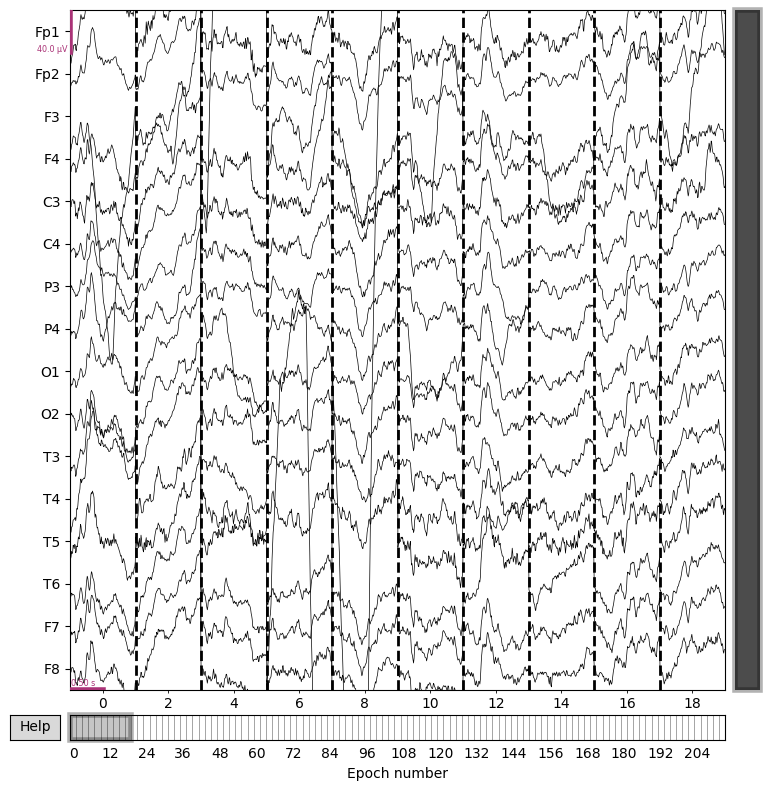

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Number of channels after picking EEG types: 16
Applied a 1-40 Hz band-pass filter
Set standard_1020 montage.
Created 107 epochs from the data

------------------------Running Feature Extraction------------------------
PSD Feature matrix X created with shape: (107, 48)

------------------------Feature Extraction Results------------------------
Shape of our feature matrix X: (107, 48)
Example of the first row of X (first 10 features): [2.28649762e-12 1.12976589e-12 2.21044611e-13 2.04646615e-12
 7.52041106e-13 8.48470551e-14 1.30366241e-11 1.45470702e-12
 2.40051193e-13 8.18870308e-13]

Shape of our labels vector y: (107,)
Unique labels found in y: [ 3  4  5  6  7  8  9 10 11]
Example of the first 5 labels: [ 4  5 11  5  7]


In [4]:
import mne
import numpy as np
from preprocessing import preprocessing
from epoching import create_epochs
import os


def extract_psd_features(epochs_data):

    # For each epoch it calculates the average power in predefined frequency bands (Theta, Alpha, Beta) for each EEG channel.

    FREQ_BANDS = {
        "theta": [4, 8],
        "alpha": [8, 13],
        "beta": [13, 30]
    }

    spectrum = epochs_data.compute_psd(method='welch', fmin=4.0, fmax=30.0, picks='eeg', verbose=False)
    psds, freqs = spectrum.get_data(return_freqs=True)

    X = []
    for epoch_psds in psds:
        epoch_features = []
        for ch_psds in epoch_psds:
            for band, f_range in FREQ_BANDS.items():
                band_indices = np.where((freqs >= f_range[0]) & (freqs < f_range[1]))[0]
                avg_power = np.mean(ch_psds[band_indices])
                epoch_features.append(avg_power)
        X.append(epoch_features)

    X = np.array(X)
    y = epochs_data.events[:, -1]

    print(f"PSD Feature matrix X created with shape: {X.shape}")

    return X, y


# Test for one file
DATA_FOLDER = "dataset"
EXAMPLE_USER = "2D663E30"
EXAMPLE_EEG_FILENAME = "EEG_ExperimentBlock.HONEST_RESPONSE_TO_TRUE_IDENTITY_raw.fif"
EXAMPLE_EEG_PATH = os.path.join(DATA_FOLDER, EXAMPLE_USER, EXAMPLE_EEG_FILENAME)

raw = mne.io.read_raw_fif(EXAMPLE_EEG_PATH, preload=True, verbose=False)
raw.apply_function(lambda x: x * 1e-6)
preprocessed_raw = preprocessing(raw)
epochs = create_epochs(preprocessed_raw)

if epochs:
    print("\n------------------------Running Feature Extraction------------------------")
    X, y = extract_psd_features(epochs)

    print("\n------------------------Feature Extraction Results------------------------")
    print("Shape of our feature matrix X:", X.shape)
    print("Example of the first row of X (first 10 features):", X[0, :10])
    print("\nShape of our labels vector y:", y.shape)
    print("Unique labels found in y:", np.unique(y))
    print("Example of the first 5 labels:", y[:5])

Found 17 participant folders.

------------------------Processing participant: 02F6BC66------------------------
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Number of channels after picking EEG types: 16
Applied a 1-40 Hz band-pass filter
Set standard_1020 montage.
Created 109 epochs from the data
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Number of channels after picking EEG types: 16
Applied a 1-40 Hz band-pass filter
Set standard_1020 montage.
Created 108 epochs from the data
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Number of channels after picking EEG types: 16
Applied a 1-40 Hz band-pass filter
Set standard_1020 montage.
Created 108 epochs from the data
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Number of channels after picking EEG types: 16
Applied a 1-40 Hz band-pass filter
Set standard_1020 montage.
Created 111 epochs from the data

-----------

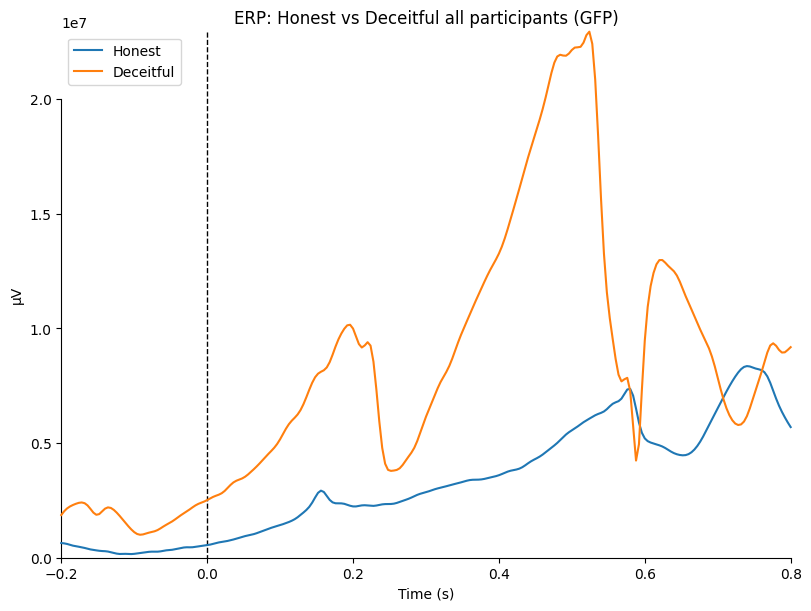

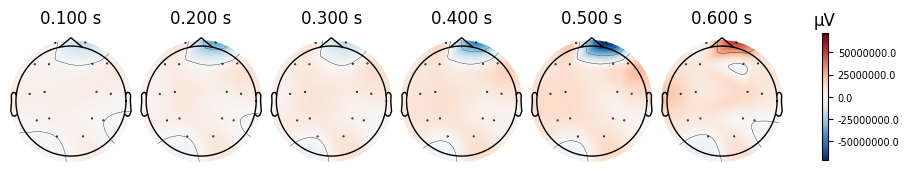

In [6]:
import sys

import mne
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import warnings
from preprocessing import preprocessing
from epoching import create_epochs

warnings.filterwarnings("ignore", message="Concatenation of Annotations within Epochs is not supported yet")
warnings.filterwarnings("ignore", category=RuntimeWarning, message="More events than default colors available")
warnings.filterwarnings("ignore", message="FigureCanvasAgg is non-interactive, and thus cannot be shown")

DATA_FOLDER = "dataset"

# We findind all subdirectories in the dataset folder. Subdirectories is the particinants
participant_dirs = [d for d in os.listdir(DATA_FOLDER) if os.path.isdir(os.path.join(DATA_FOLDER, d))]
print(f"Found {len(participant_dirs)} participant folders.")

# Building event_id map. We need this map so that event IDs like PersonalDataField are consistent across all files.
all_descriptions = set() # Using a set automatically handles duplicates

# Loop through each participant folder
for participant_uuid in participant_dirs:
    participant_path = os.path.join(DATA_FOLDER, participant_uuid)

    # Find all raw .fif files for this participant
    files = glob.glob(os.path.join(participant_path, "*_raw.fif"))

    # Loop through the files found
    for f in files:
        try:
            raw = mne.io.read_raw_fif(f, preload=False, verbose=False)

            # Get unique annotation descriptions from this file
            descriptions = np.unique(raw.annotations.description)
            #print("descriptionnnnnn",descriptions)

            # Add these descriptions to our master set
            all_descriptions.update(descriptions)
        except Exception as e:
            print(f"Skipping file {os.path.basename(f)}: {e}")

# Create the final map: {description_string: integer_id}
master_event_id = {desc: i+1 for i, desc in enumerate(sorted(list(all_descriptions)))}
#print("maaaaster",master_event_id)

#print(f"Master map created with {len(master_event_id)} unique event types.")

# Create lists to store epochs for each condition
all_honest_epochs = []
all_deceitful_epochs = []

# Loop through each participant folder
for participant_uuid in participant_dirs:
    participant_path = os.path.join(DATA_FOLDER, participant_uuid)
    print(f"\n------------------------Processing participant: {participant_uuid}------------------------")

    honest_files = glob.glob(os.path.join(participant_path, "*HONEST*raw.fif"))
    deceitful_files = glob.glob(os.path.join(participant_path, "*DECEITFUL*raw.fif"))

    try:
        # Processing honest files
        for h_file in honest_files:
            raw_honest = mne.io.read_raw_fif(h_file, preload=True, verbose=False)
            prep_honest = preprocessing(raw_honest) # we applying preprocessing like filtering
            epochs_honest = create_epochs(prep_honest, master_event_id=master_event_id)

            if epochs_honest and len(epochs_honest) > 0:
                all_honest_epochs.append(epochs_honest)

        # Processing deceitful files
        for d_file in deceitful_files:
            raw_deceitful = mne.io.read_raw_fif(d_file, preload=True, verbose=False)
            prep_deceitful = preprocessing(raw_deceitful)
            epochs_deceitful = create_epochs(prep_deceitful, master_event_id=master_event_id)
            if epochs_deceitful and len(epochs_deceitful) > 0:
                all_deceitful_epochs.append(epochs_deceitful)

    except Exception as e:
        print(f"Error processing {participant_uuid}: {e}")


# Check if we actually loaded any data
if all_honest_epochs and all_deceitful_epochs:
    # Combine all the small Epochs objects into two big ones
    combined_honest = mne.concatenate_epochs(all_honest_epochs)
    combined_deceitful = mne.concatenate_epochs(all_deceitful_epochs)

    print(f"Total honest epochs collected: {len(combined_honest)}")
    print(f"Total deceitful epochs collected: {len(combined_deceitful)}")

    # Calculate the average brain wave across all epochs for each condition
    evoked_honest = combined_honest.average()
    evoked_deceitful = combined_deceitful.average()

    #print("hoooneest", evoked_honest)

    # Dictionary to hold the average ERPs
    evokeds = {"Honest": evoked_honest, "Deceitful": evoked_deceitful}

    # Plot 1 - compare ERP waveforms
    mne.viz.plot_compare_evokeds(evokeds,
                                 picks='eeg', # we are using only EEG channels
                                 legend='upper left',
                                 title="ERP: Honest vs Deceitful all participants")

    # Plot 2 - Calculate and plot the difference topomaps

    # Calculate the difference wave: Honest minus Deceitful
    diff_erp = mne.combine_evoked([evoked_honest, evoked_deceitful], weights=[1, -1])

    # Define specific time points to show the scalp map for in seconds
    topo_times = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

    # Generate the topomap plot
    diff_erp.plot_topomap(times=topo_times)
    plt.show()

else:
    print("No epochs were loaded")

Found 17 participant folders.
Found 7 male and 9 female participants in survey

------------------------Processing data with gender segregation------------------------
--- Processing: 02F6BC66 ---
Matched folder to gender: Male
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Number of channels after picking EEG types: 16
Applied a 1-40 Hz band-pass filter
Set standard_1020 montage.
Created 109 epochs from the data
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Number of channels after picking EEG types: 16
Applied a 1-40 Hz band-pass filter
Set standard_1020 montage.
Created 108 epochs from the data
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Number of channels after picking EEG types: 16
Applied a 1-40 Hz band-pass filter
Set standard_1020 montage.
Created 108 epochs from the data
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Number of channels after picking EEG t

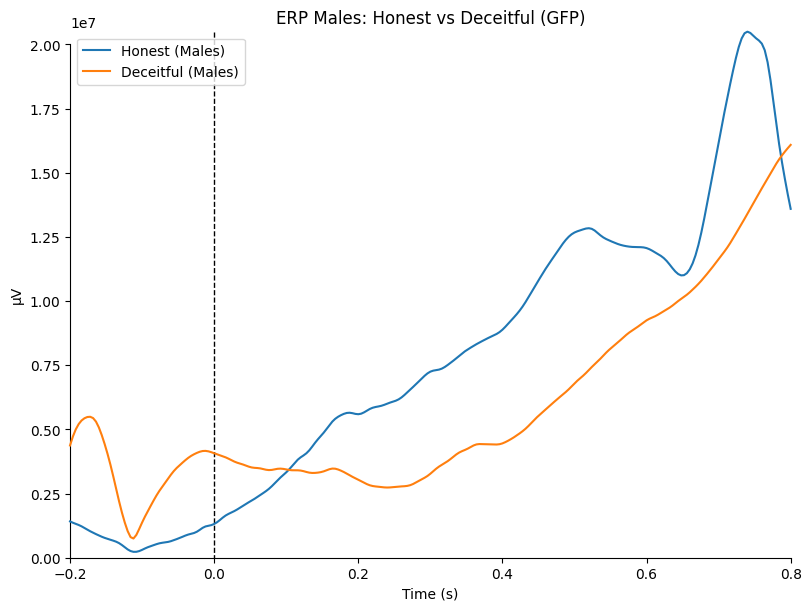

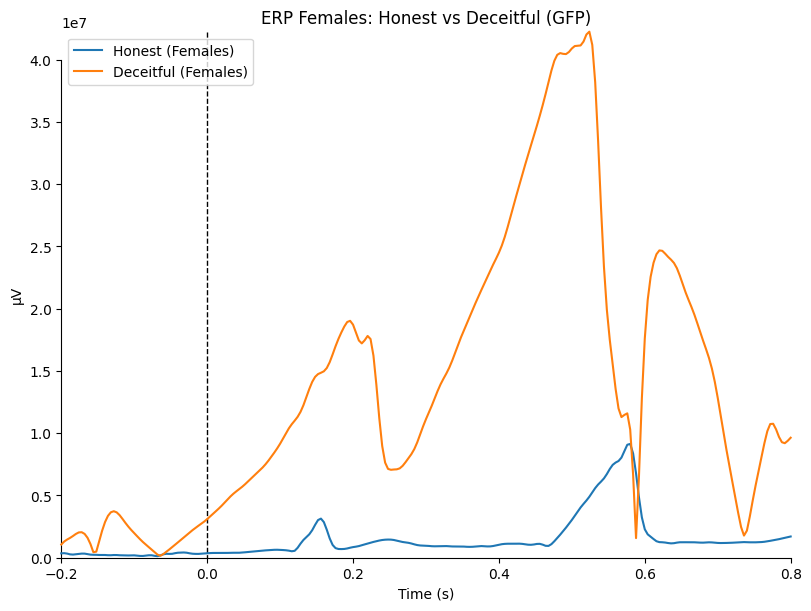

In [9]:
import pandas as pd
import mne
import matplotlib.pyplot as plt
import os
import glob
import numpy as np
import warnings
from preprocessing import preprocessing
from epoching import create_epochs

warnings.filterwarnings("ignore", message="Concatenation of Annotations within Epochs is not supported yet.")
warnings.filterwarnings("ignore", category=RuntimeWarning, message="More events than default colors available.")
warnings.filterwarnings("ignore", message="FigureCanvasAgg is non-interactive, and thus cannot be shown")

DATA_FOLDER = "dataset"
SURVEY_FILE = os.path.join(DATA_FOLDER, "Ankiety.xlsx")
UUID_COLUMN = 'UUID'
GENDER_COLUMN = 'Płeć'

# Find all participant directories
participant_dirs = [d for d in os.listdir(DATA_FOLDER) if os.path.isdir(os.path.join(DATA_FOLDER, d))]
print(f"Found {len(participant_dirs)} participant folders.")

# Building event_id map. We need this map so that event IDs like PersonalDataField are consistent across all files.
all_descriptions = set() # Set to store unique event descriptions

# # Loop through each participant folder - collecting event descriptions
for participant_uuid in participant_dirs:
    participant_path = os.path.join(DATA_FOLDER, participant_uuid)

    # Find all raw .fif files for this participant
    files = glob.glob(os.path.join(participant_path, "*_raw.fif"))

    # Loop through the files found
    for f in files:
        try:
            raw = mne.io.read_raw_fif(f, preload=False, verbose=False)

            # Get unique annotation descriptions from this file
            descriptions = np.unique(raw.annotations.description)

            # Add these descriptions to our master set
            all_descriptions.update(descriptions)
        except Exception as e:
            print(f"Skipping file {os.path.basename(f)}: {e}")

# Create the final map {description: id} AFTER the collection loop
# Sorting ensures consistency across runs
master_event_id = {desc: i+1 for i, desc in enumerate(sorted(list(all_descriptions)))}
#print(f"Master map created with {len(master_event_id)} unique events.")

try:
    df_survey = pd.read_excel(SURVEY_FILE)
    # Converting UUID and gender to lowercase strings for easier comparison

    df_survey[UUID_COLUMN] = df_survey[UUID_COLUMN].astype(str).str.lower()
    df_survey[GENDER_COLUMN] = df_survey[GENDER_COLUMN].astype(str).str.lower()

except Exception as e:
    print(f"ERROR: Could not load or process {SURVEY_FILE}. {e}")
    raise e

# Create lists of UUIDs for males and females
try:
    male_uuids = df_survey[df_survey[GENDER_COLUMN] == 'm'][UUID_COLUMN].tolist()
    female_uuids = df_survey[df_survey[GENDER_COLUMN] == 'k'][UUID_COLUMN].tolist()
    print(f"Found {len(male_uuids)} male and {len(female_uuids)} female participants in survey")
except KeyError:
    print(f"ERROR: Column '{GENDER_COLUMN}' or '{UUID_COLUMN}' not foundin survey ")
    raise

print("\n------------------------Processing data with gender segregation------------------------")
male_honest_epochs = []
male_deceitful_epochs = []
female_honest_epochs = []
female_deceitful_epochs = []

# Main processing loop
for participant_folder_name in participant_dirs:
    print(f"--- Processing: {participant_folder_name} ---")

    participant_folder_lower = participant_folder_name.lower()

    # Check if a known UUID is part of the folder name
    is_male = any(uuid in participant_folder_lower for uuid in male_uuids)
    is_female = any(uuid in participant_folder_lower for uuid in female_uuids)

    # Skip folder if it doesn't match any gender/UUID from the survey
    if not (is_male or is_female):
        print(f"Skipped: Folder {participant_folder_name} does not match any UUID from survey.")
        continue

    print(f"Matched folder to gender: {'Male' if is_male else 'Female'}")
    participant_path = os.path.join(DATA_FOLDER, participant_folder_name)

    # Find files for honest and deceitful conditions
    honest_files = glob.glob(os.path.join(participant_path, "*HONEST*raw.fif"))
    deceitful_files = glob.glob(os.path.join(participant_path, "*DECEITFUL*raw.fif"))

    try:
        # Processing honest files
        for h_file in honest_files:
            raw_honest = mne.io.read_raw_fif(h_file, preload=True, verbose=False)
            prep_honest = preprocessing(raw_honest)  # we applying preprocessing like filtering
            epochs_h = create_epochs(prep_honest, master_event_id=master_event_id)

            if epochs_h and len(epochs_h) > 0:
                # Add to the appropriate list based on gender
                if is_male: male_honest_epochs.append(epochs_h)
                elif is_female: female_honest_epochs.append(epochs_h)

        # Processing deceitful files
        for d_file in deceitful_files:
            raw_deceitful = mne.io.read_raw_fif(d_file, preload=True, verbose=False)
            prep_deceitful = preprocessing(raw_deceitful)
            epochs_d = create_epochs(prep_deceitful, master_event_id=master_event_id)

            if epochs_d and len(epochs_d) > 0:
                if is_male: male_deceitful_epochs.append(epochs_d)
                elif is_female: female_deceitful_epochs.append(epochs_d)

    except Exception as e:
        print(f"Error processing {participant_folder_name}: {e}")

if male_honest_epochs and male_deceitful_epochs:
    # Concatenate epochs and calculate average
    evoked_male_honest = mne.concatenate_epochs(male_honest_epochs).average()
    evoked_male_deceitful = mne.concatenate_epochs(male_deceitful_epochs).average()

    # Prepare data for plotting
    evokeds_male = {"Honest (Males)": evoked_male_honest, "Deceitful (Males)": evoked_male_deceitful}

    # Draw the plot
    mne.viz.plot_compare_evokeds(evokeds_male,
                                 picks='eeg',
                                 legend='upper left',
                                 title="ERP Males: Honest vs Deceitful",
                                 show=False)
else:
    print("Not enough data to generate plot for males")

if female_honest_epochs and female_deceitful_epochs:
    # Concatenate epochs and calculate average
    evoked_female_honest = mne.concatenate_epochs(female_honest_epochs).average()
    evoked_female_deceitful = mne.concatenate_epochs(female_deceitful_epochs).average()

    # Prepare data for plotting
    evokeds_female = {"Honest (Females)": evoked_female_honest, "Deceitful (Females)": evoked_female_deceitful}

    # Draw the plot
    mne.viz.plot_compare_evokeds(evokeds_female,
                                 picks='eeg',
                                 legend='upper left',
                                 title="ERP Females: Honest vs Deceitful",
                                 show=False)
else:
    print("Not enough data to generate plot for females.")

plt.show()